In [1]:
import matplotlib.pylab as plt
from scipy.special import erf
import numpy as np
import json
import sys
sys.path.append('./../figures/')
from makeCorner import *

First, load our mock catalogs and inference results:

In [2]:
with open('effective_spin_null_test.json','r') as jf:
    nullData = json.load(jf)

`nullData` is a dictionary containing our injected catalogs and inference results on these catalogs.
It specifically has the following key structure:

```
nullData   
│
└── '0'                             # Catalog number
│   └── 'catalog'                
│   │       └──  '0'                # Event number within given catalog
│   │       │    └── 'x_true'       # True injected chi-effective value
│   │       │    └── 'x_ml'         # "Observed" max likelihood value
│   │       │    └── 'sig_obs'      # Gaussian measurement uncertainty
│   │       └──  '1'
│   │       │    └── ...
│   │       └──  ...
│   └── 'posteriors'
│           └──  'mu'               # Posterior samples on the mean of the bulk chi-effective distribution
│           └──  'logsig'           # Posterior samples on the (log) width of the bulk distribution
│           └──  'zeta_spike'       # Posterior on the fraction of events in the zero-spin spike
└── '1'
│   └── 'catalog'
│   │       └──  ...
│   └── 'posteriors'
│           └──  ...
└── ...
```

Let's just loop over our injected catalogs and plot some results:

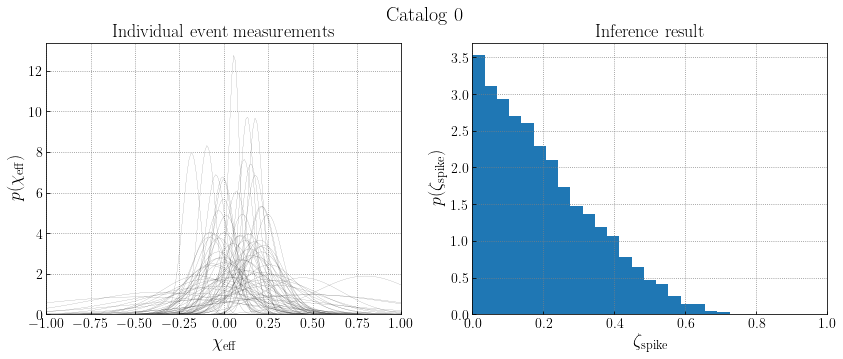

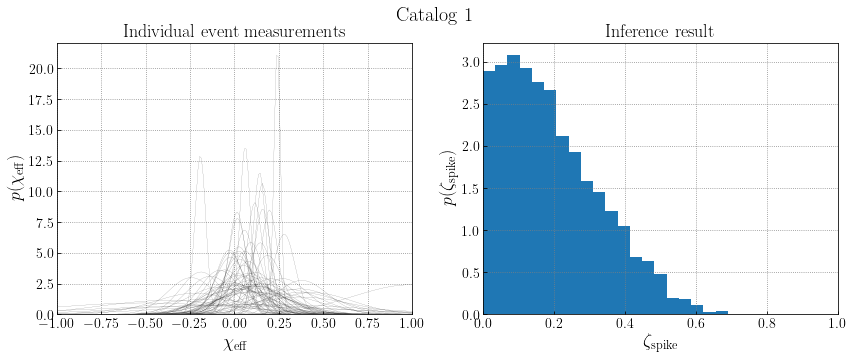

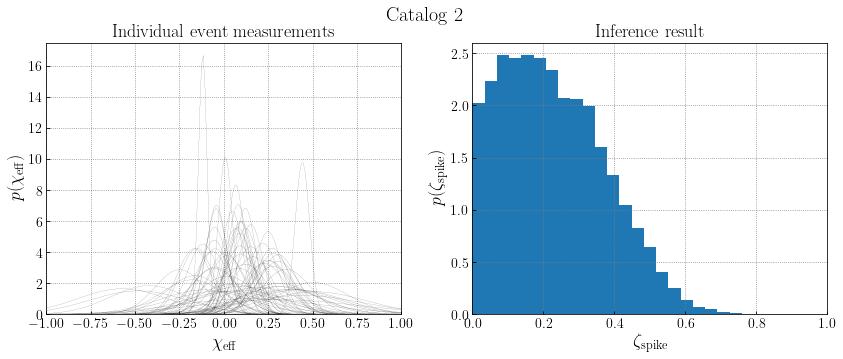

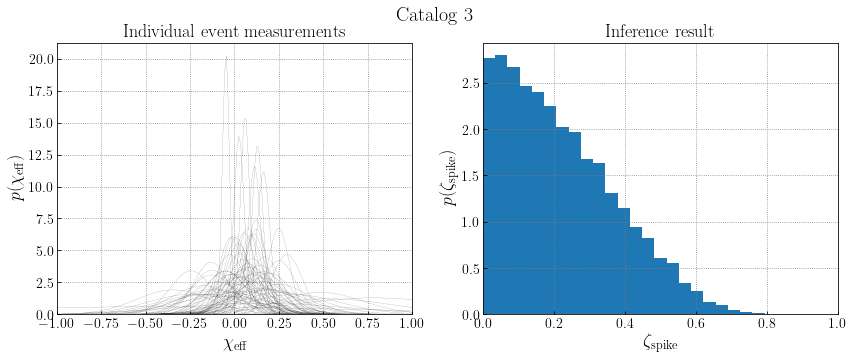

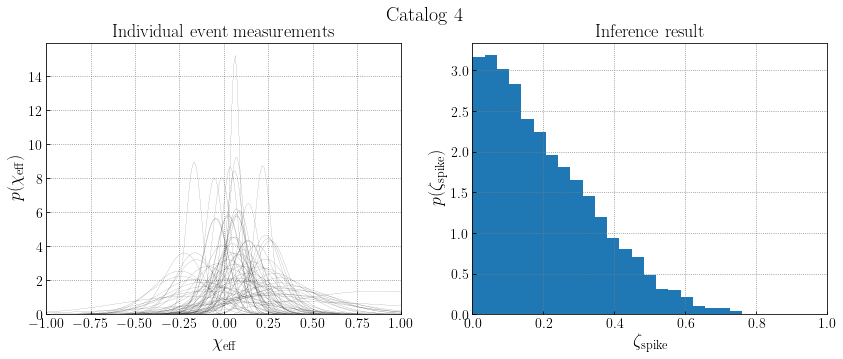

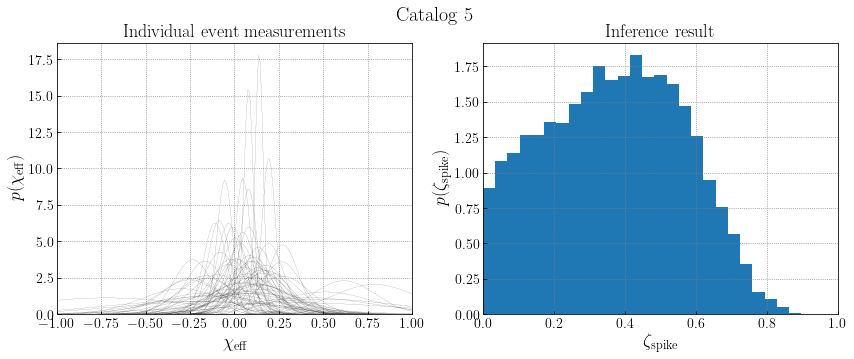

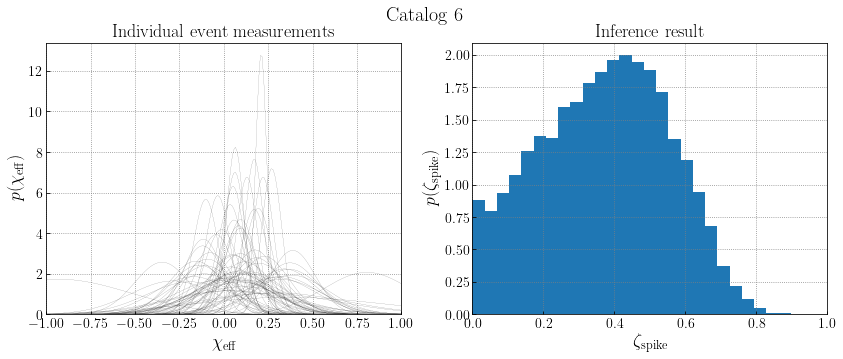

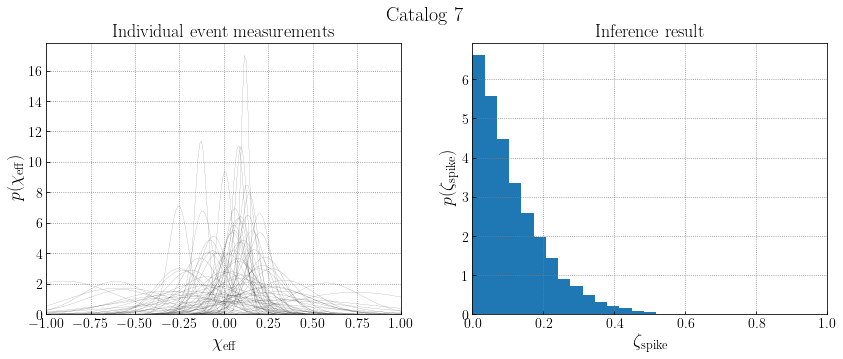

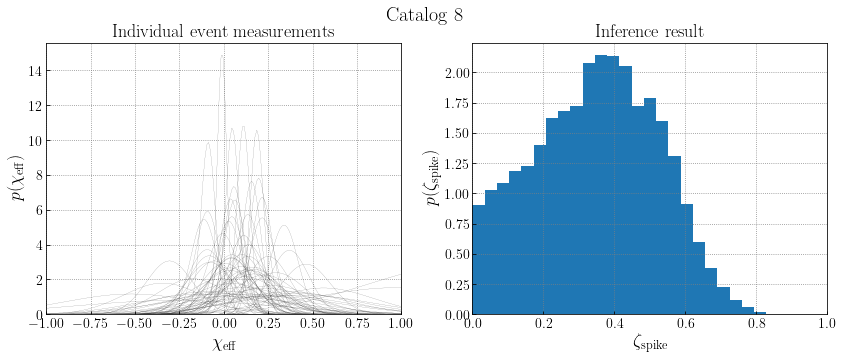

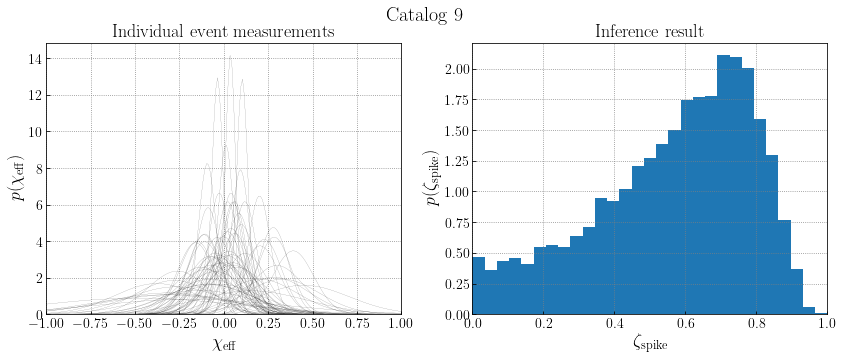

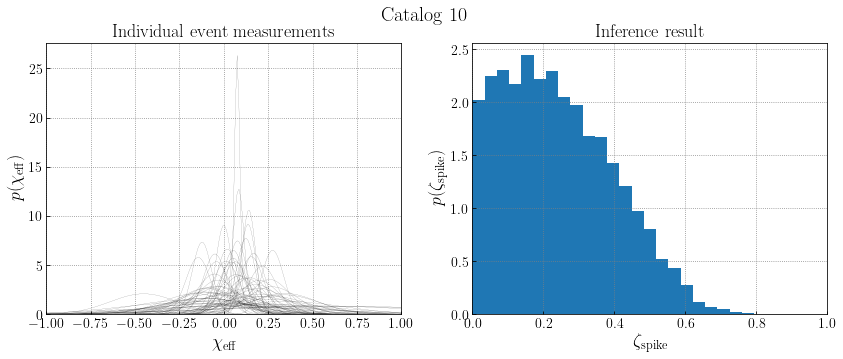

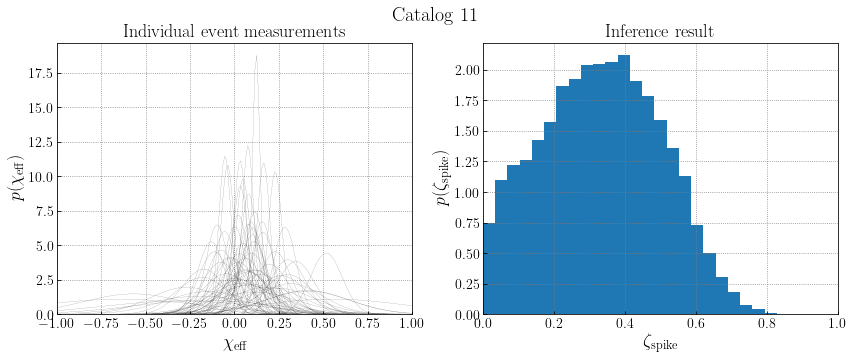

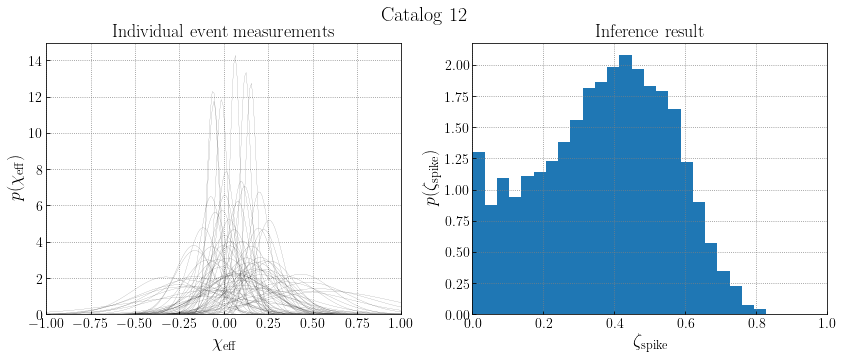

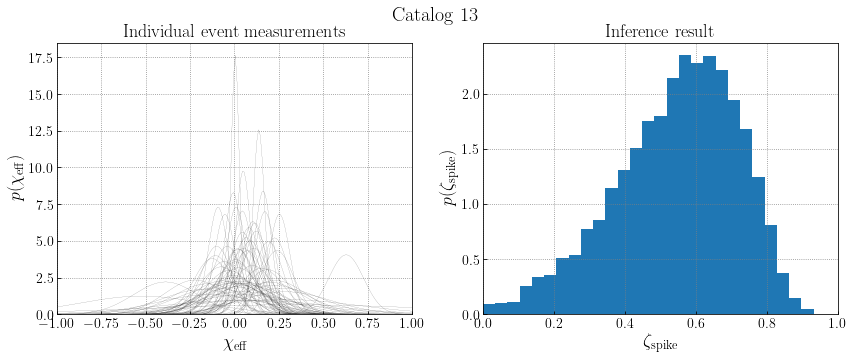

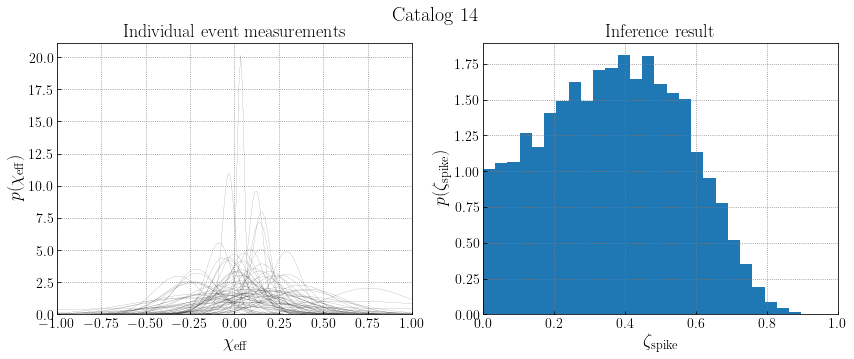

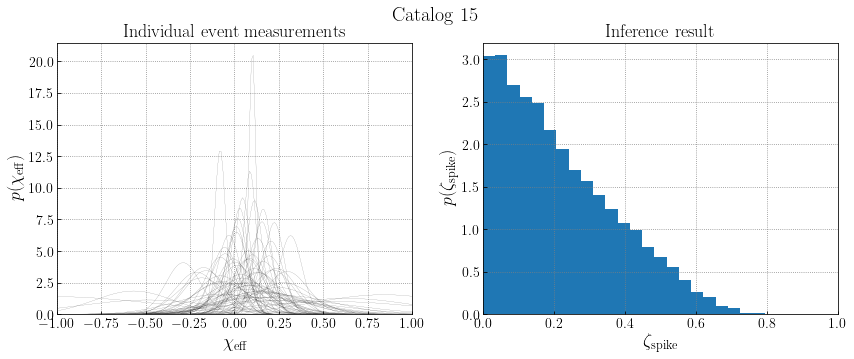

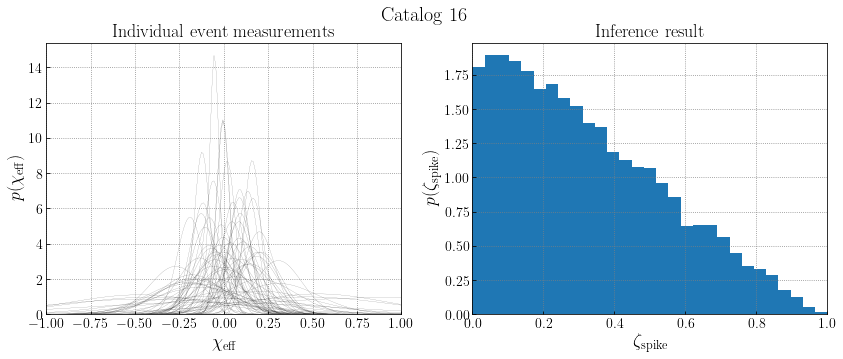

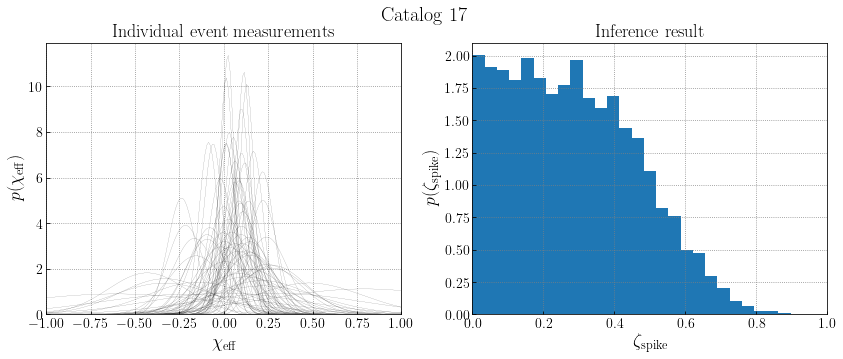

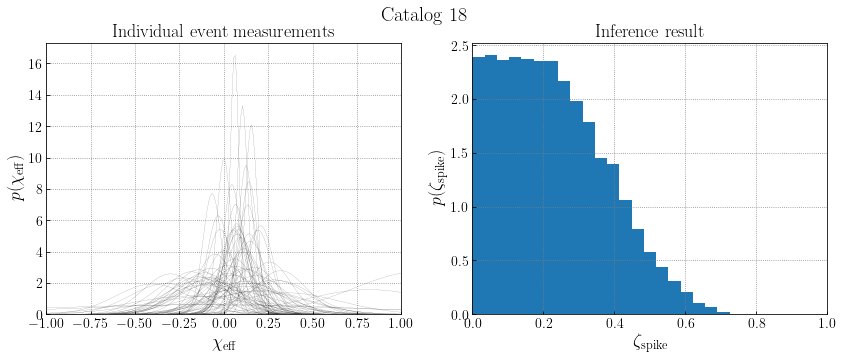

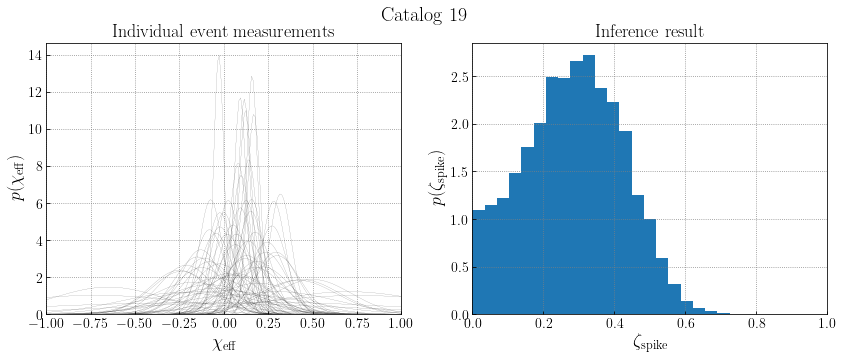

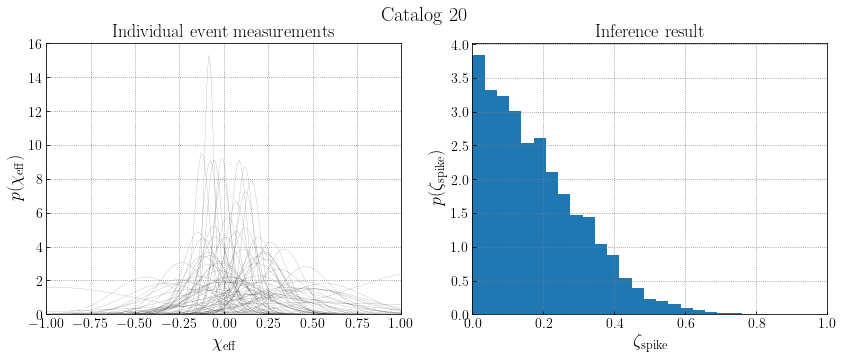

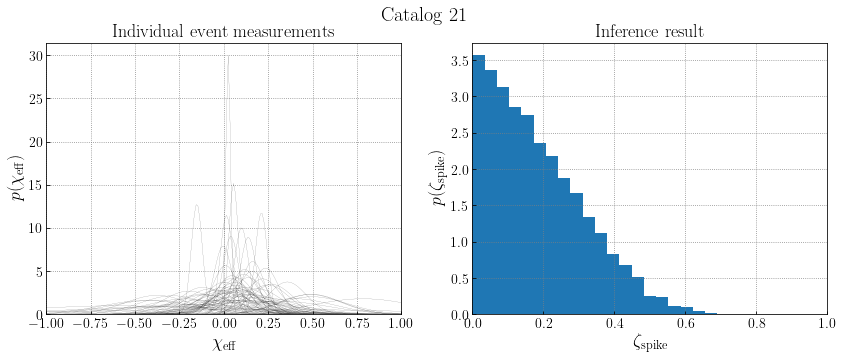

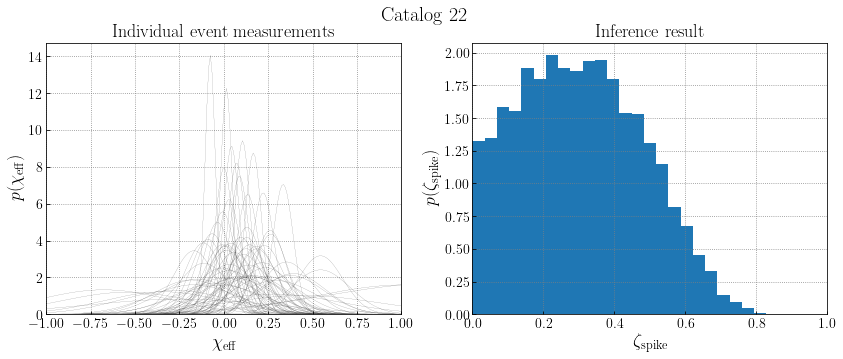

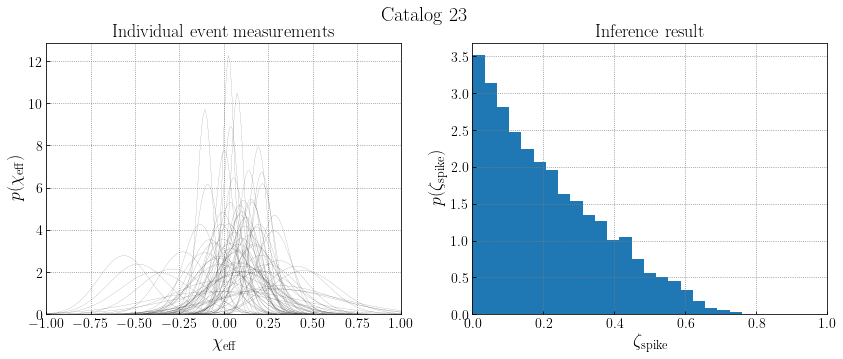

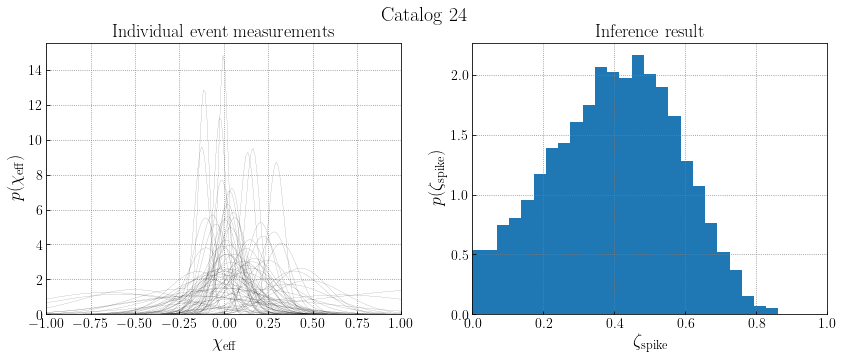

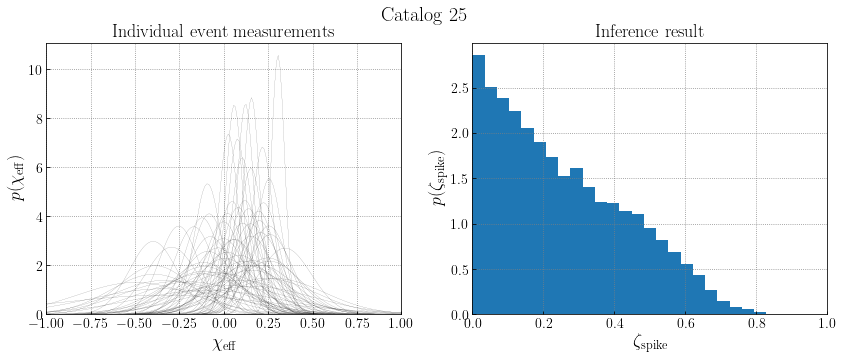

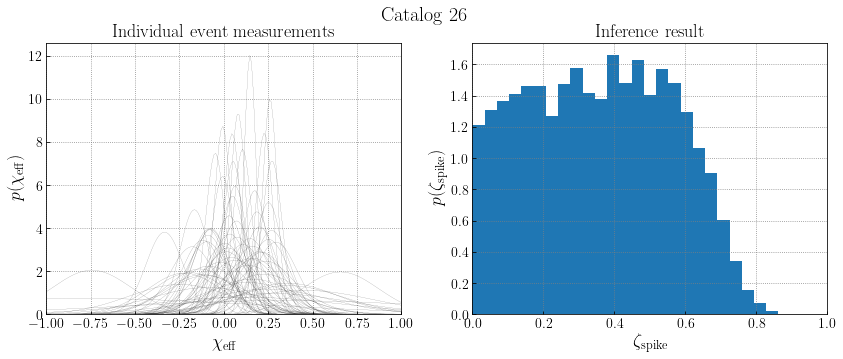

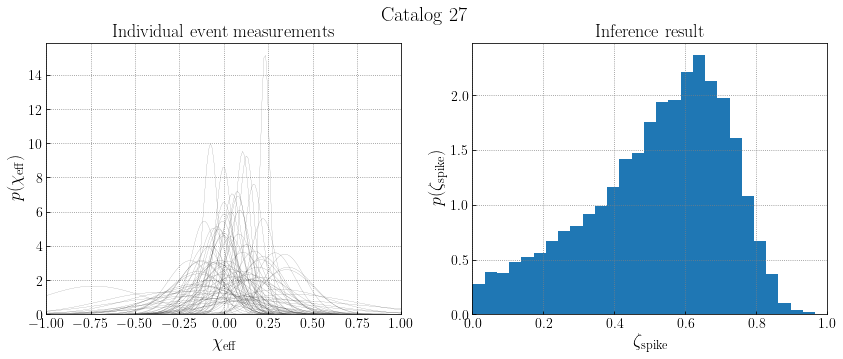

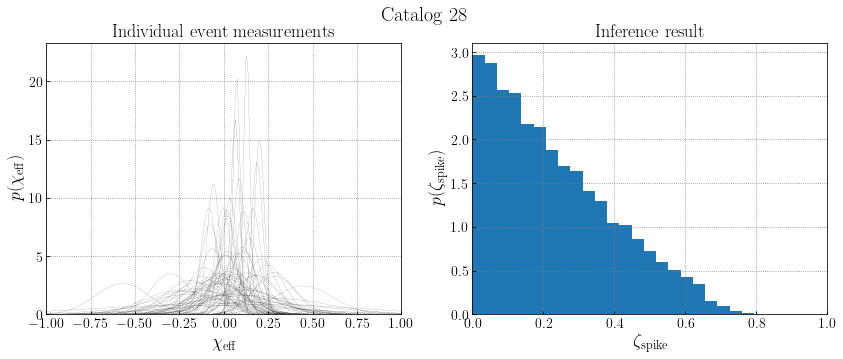

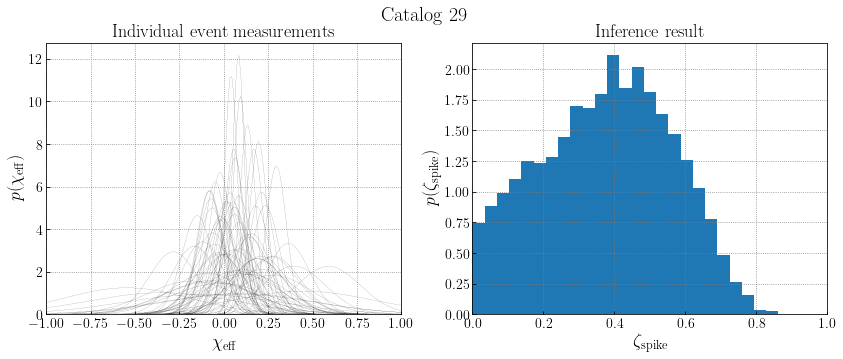

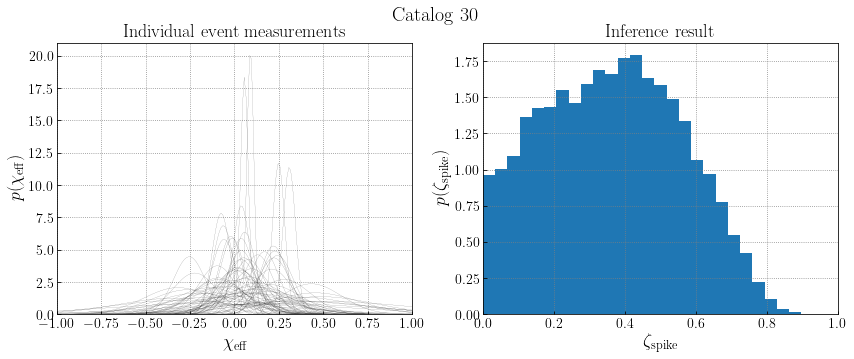

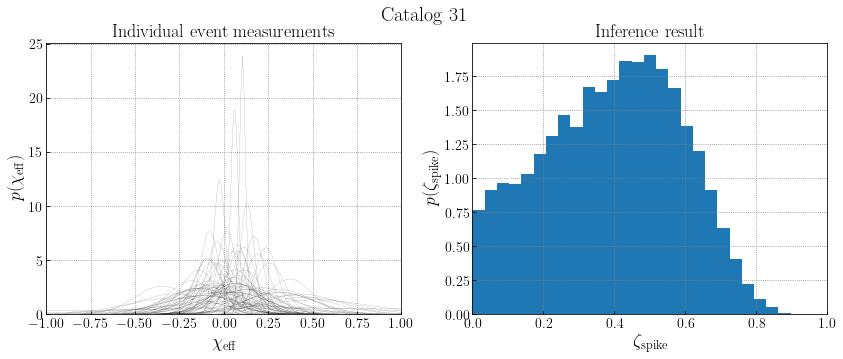

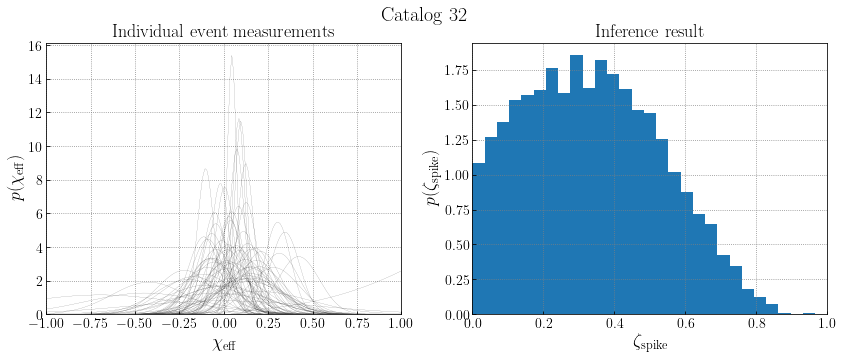

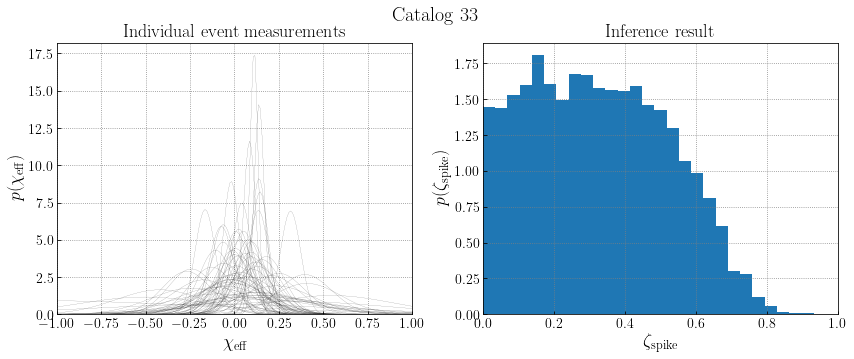

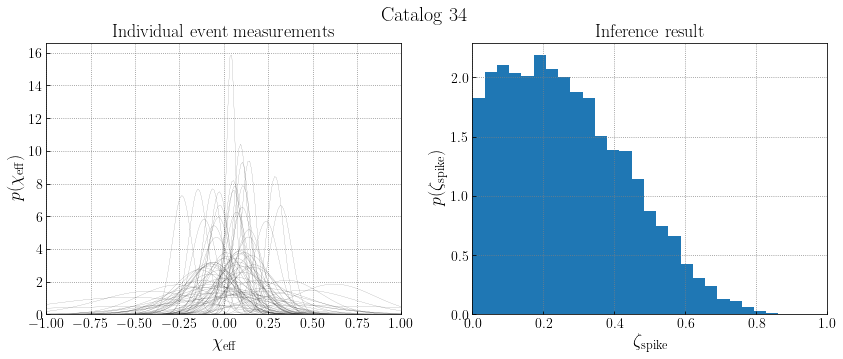

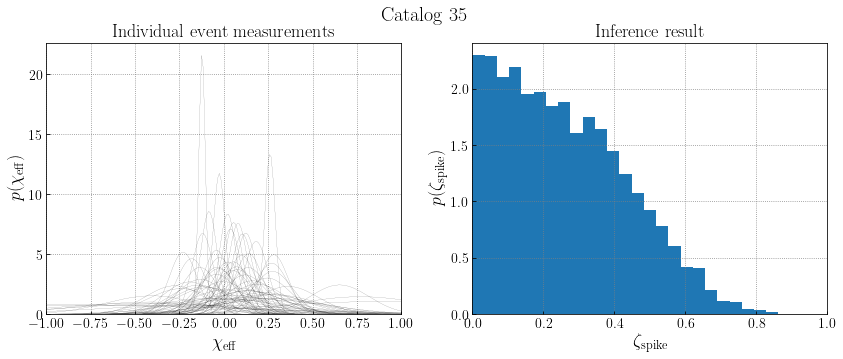

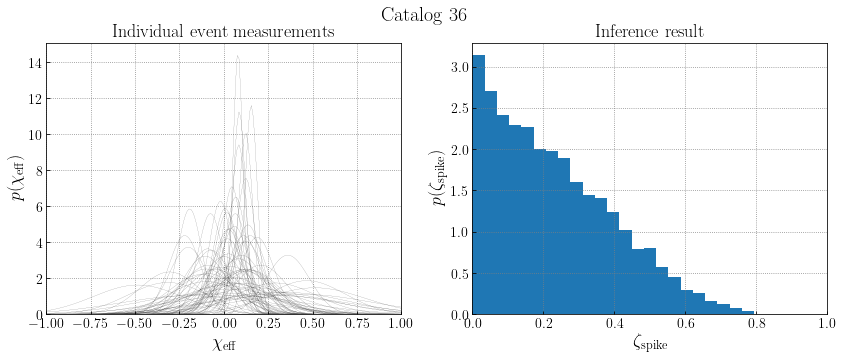

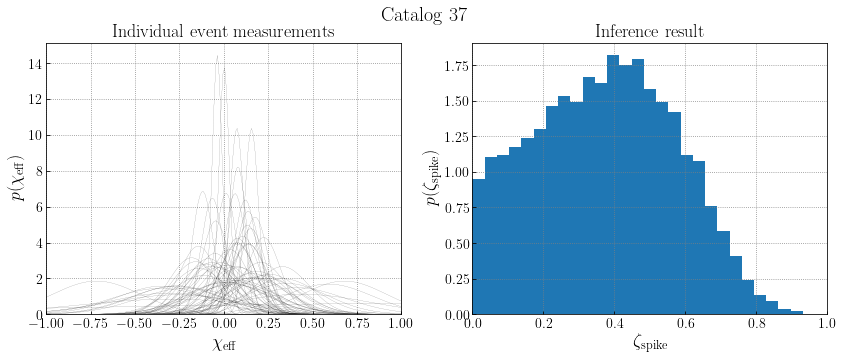

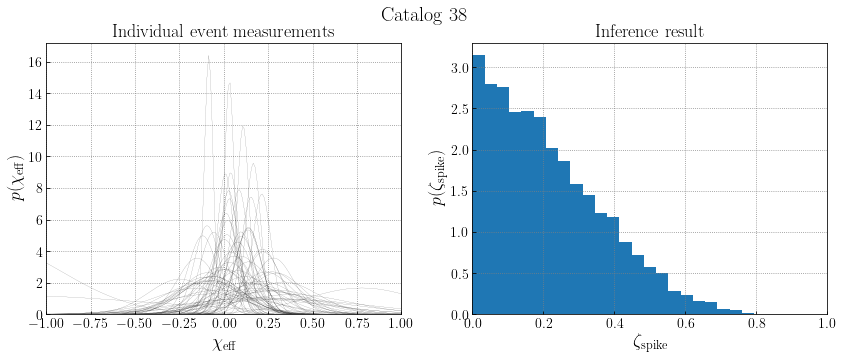

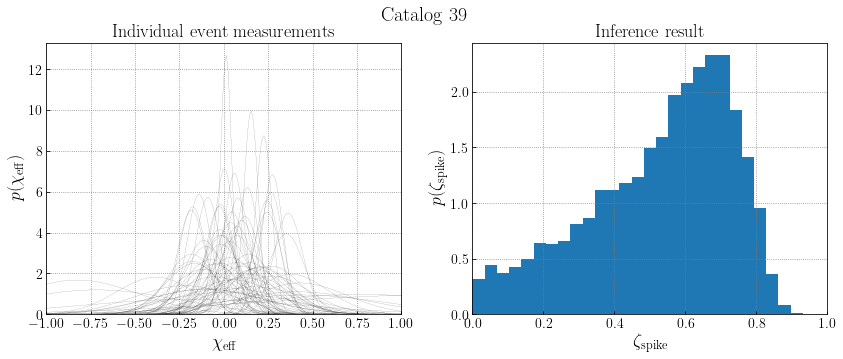

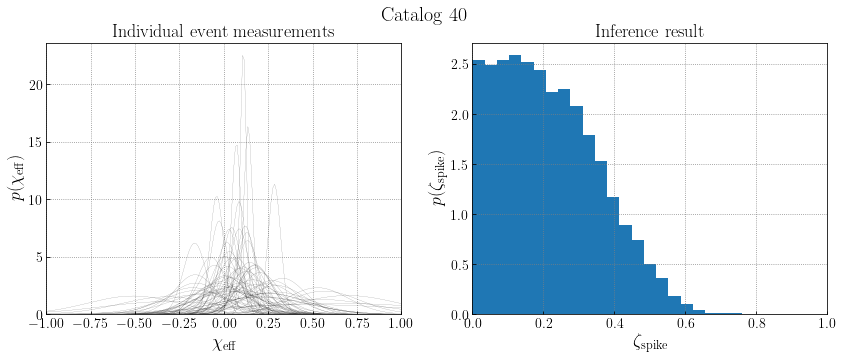

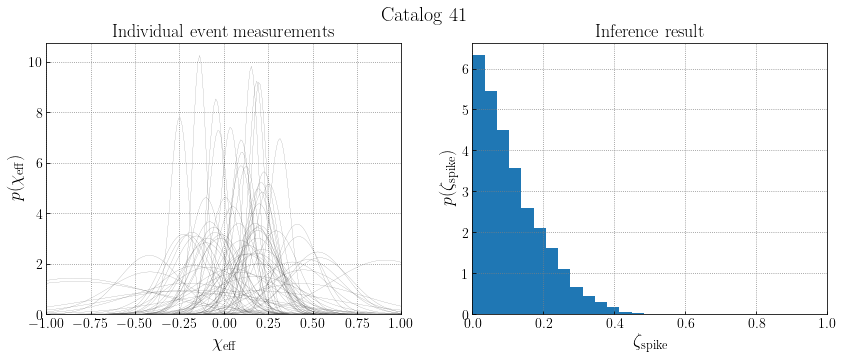

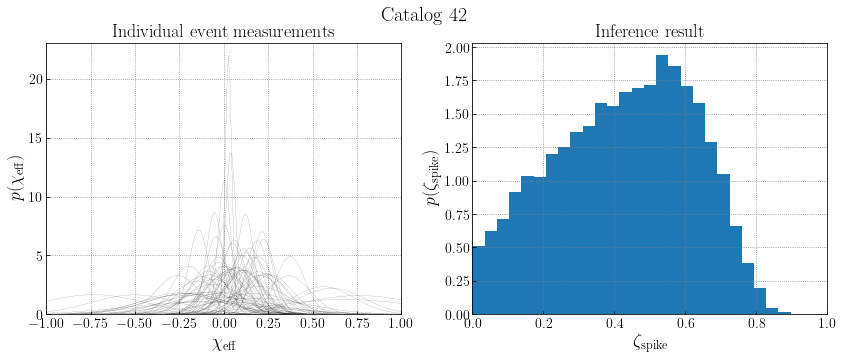

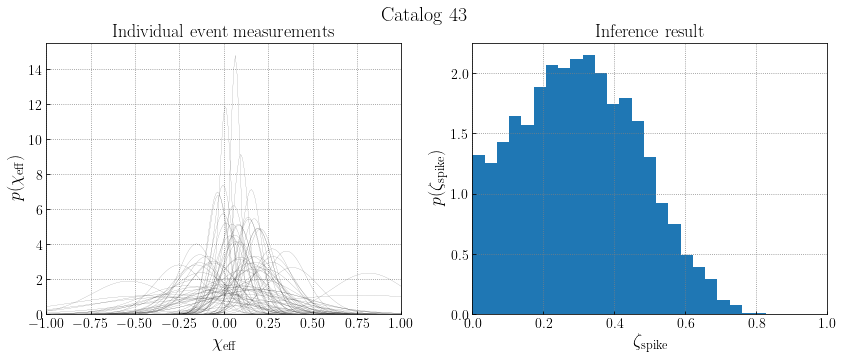

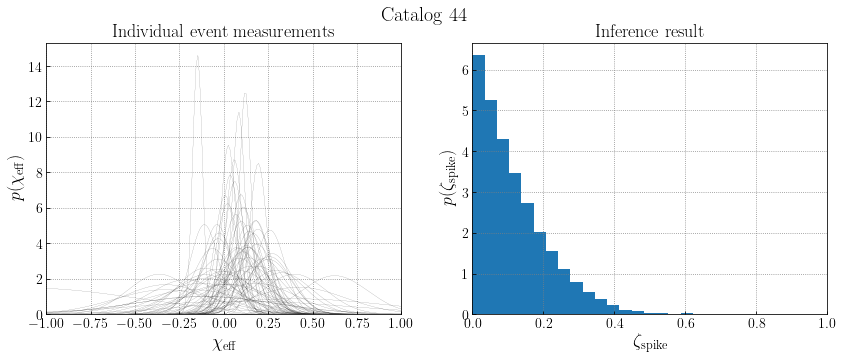

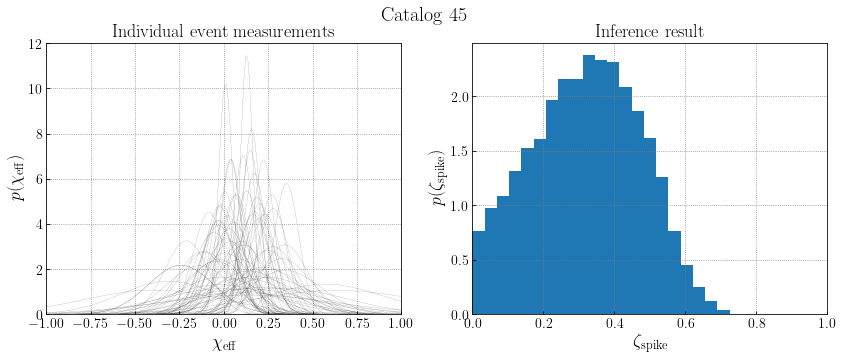

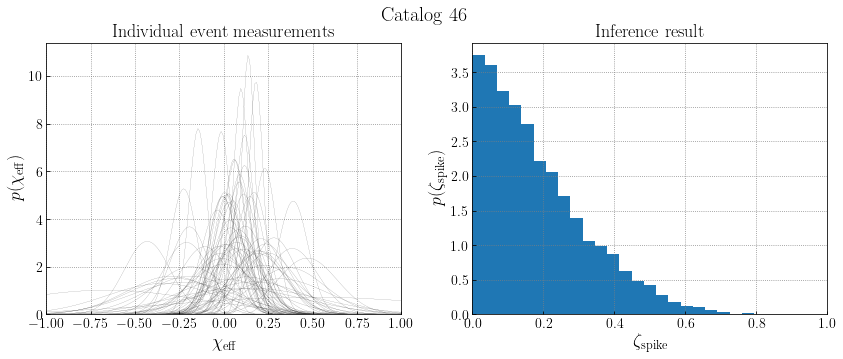

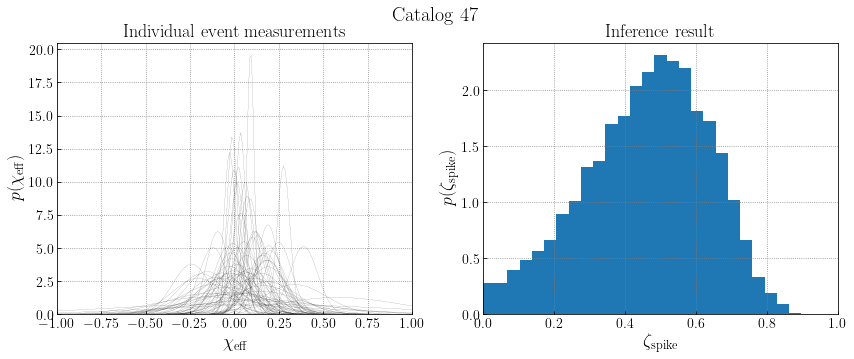

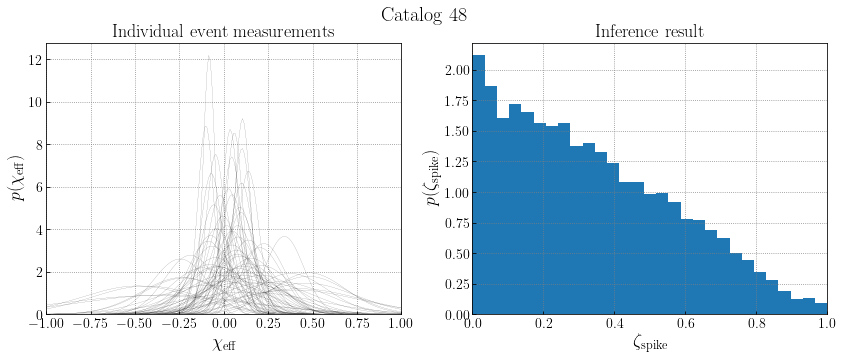

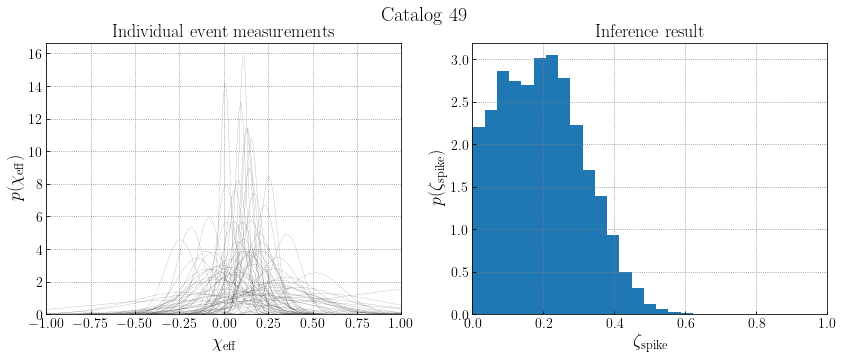

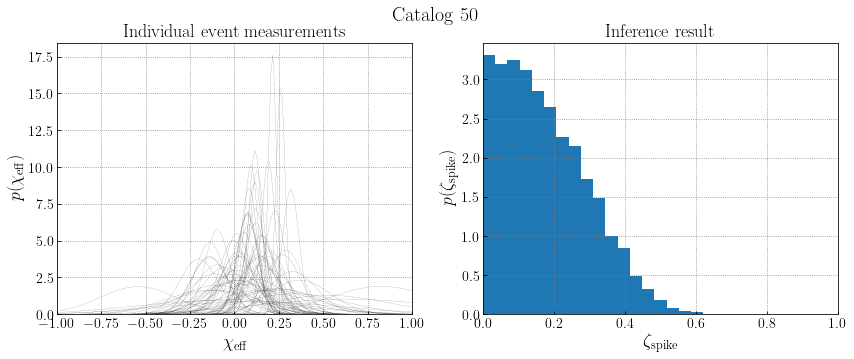

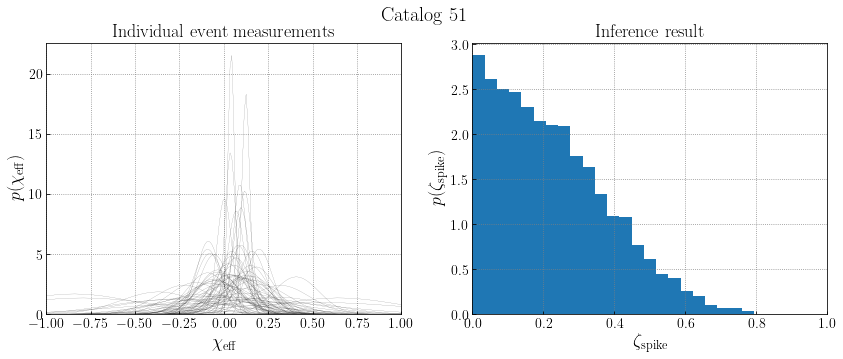

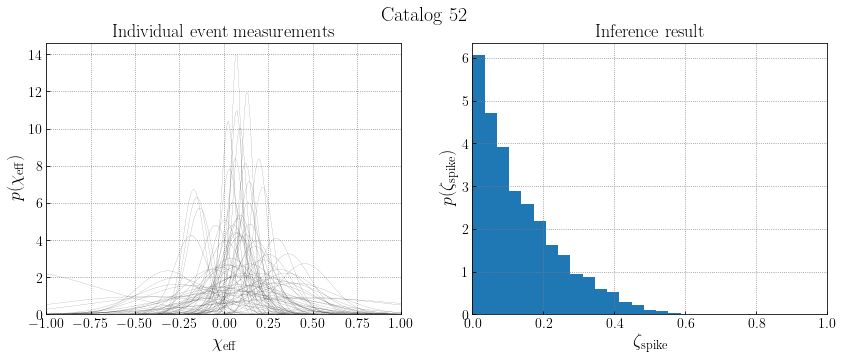

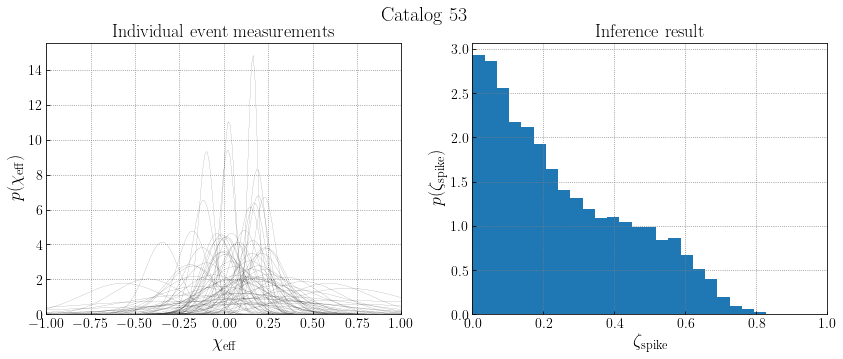

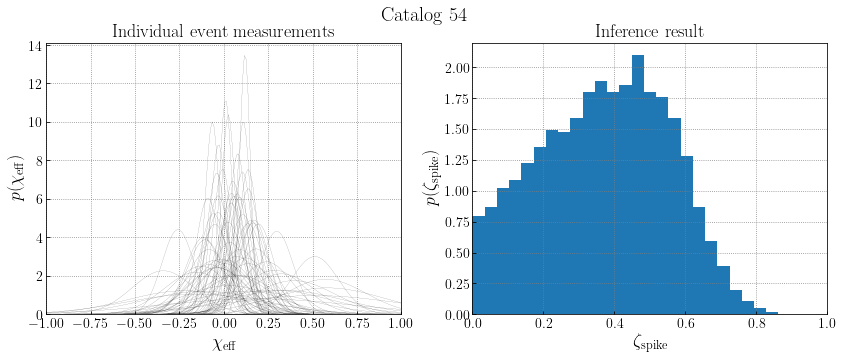

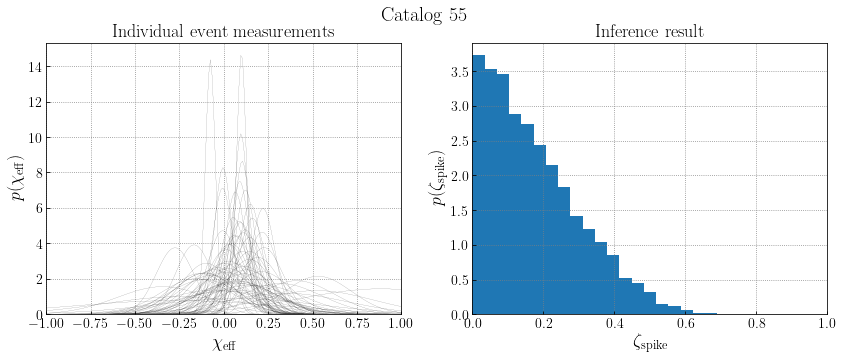

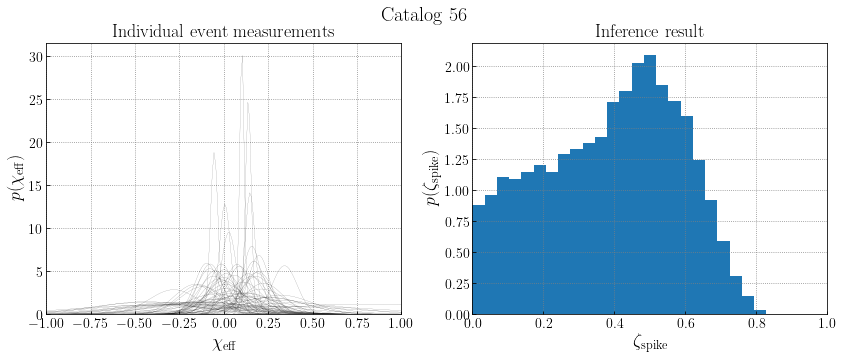

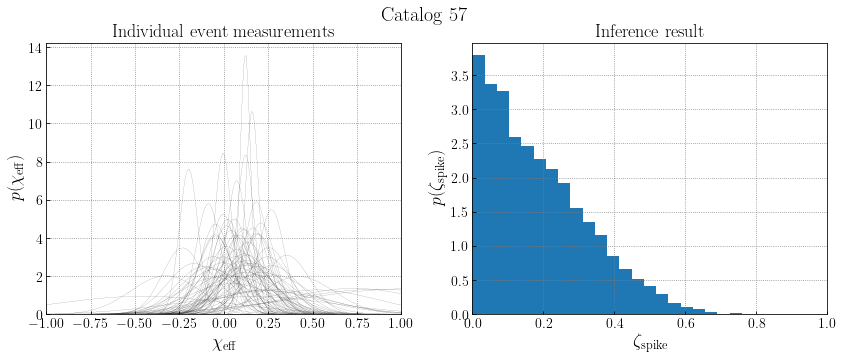

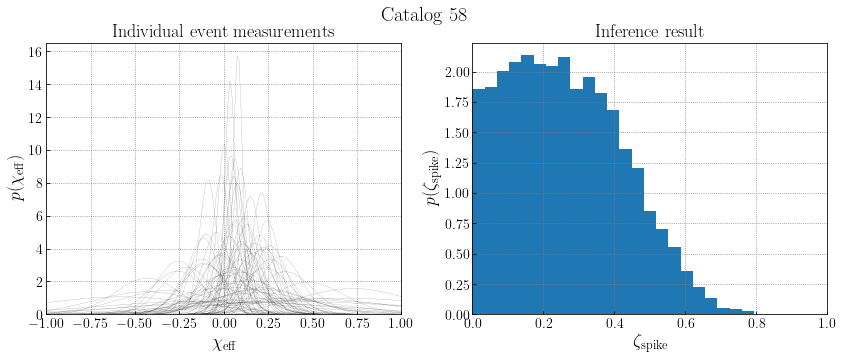

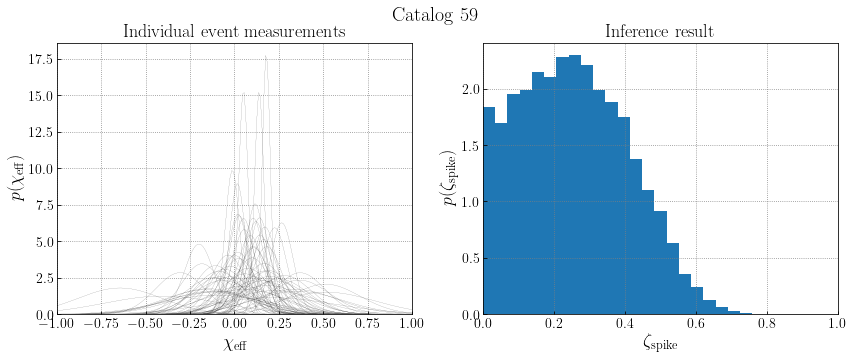

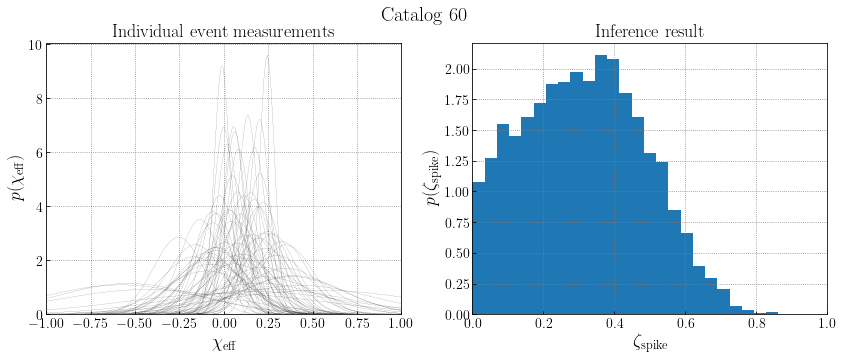

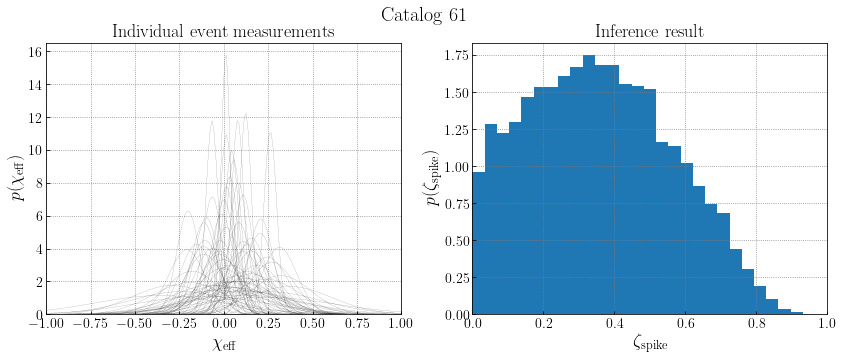

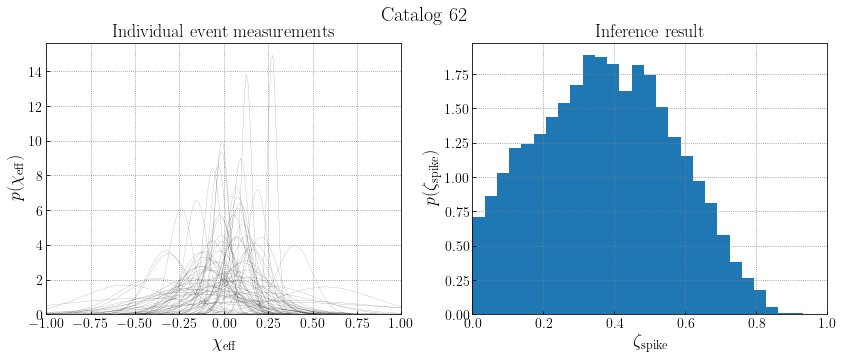

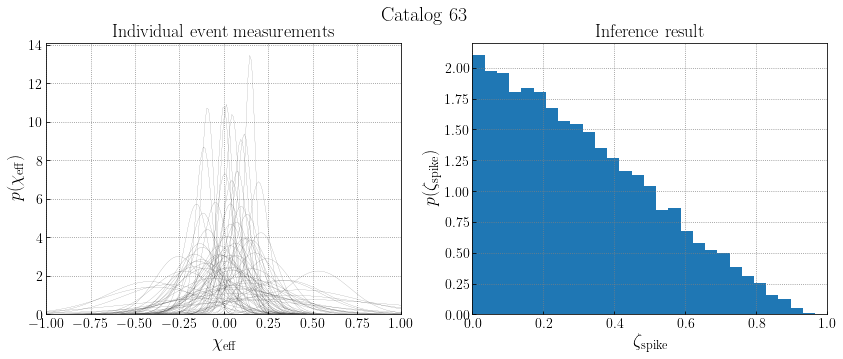

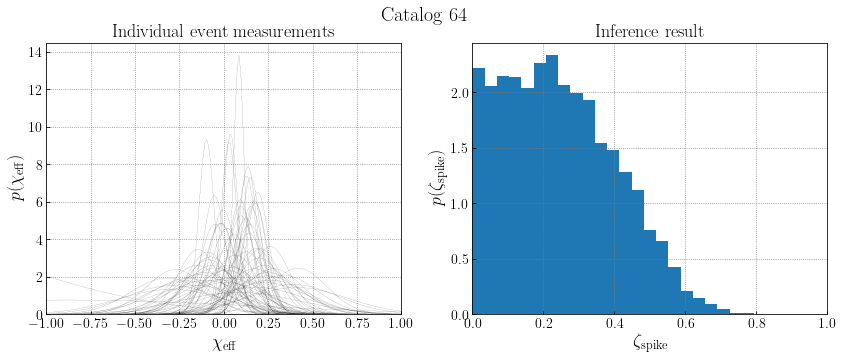

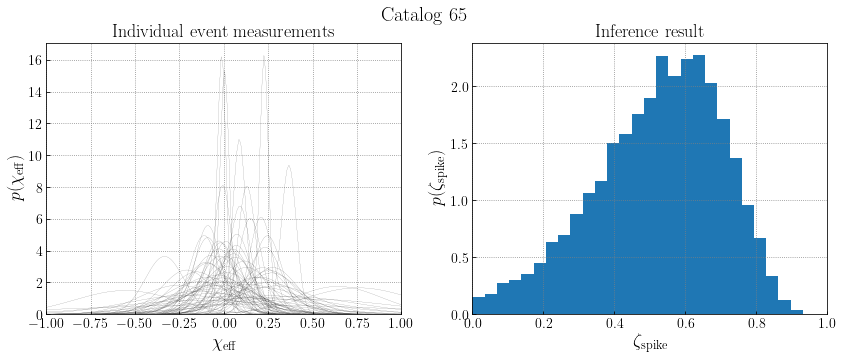

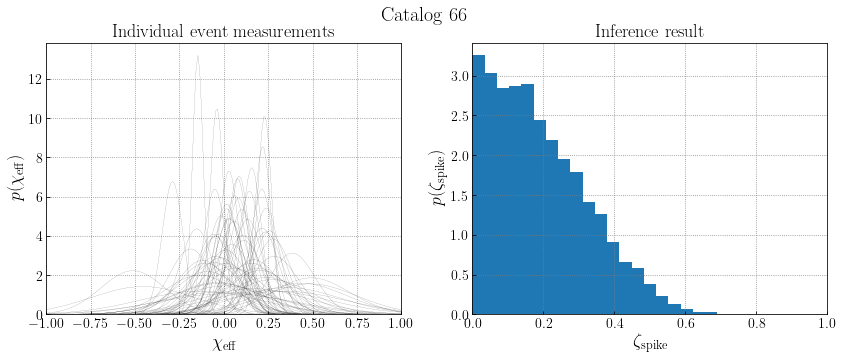

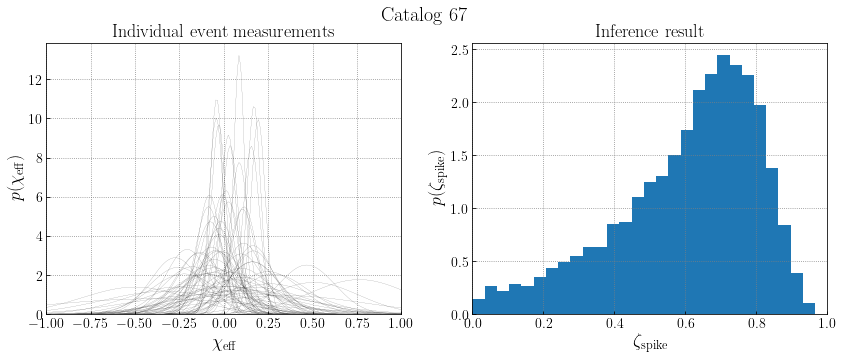

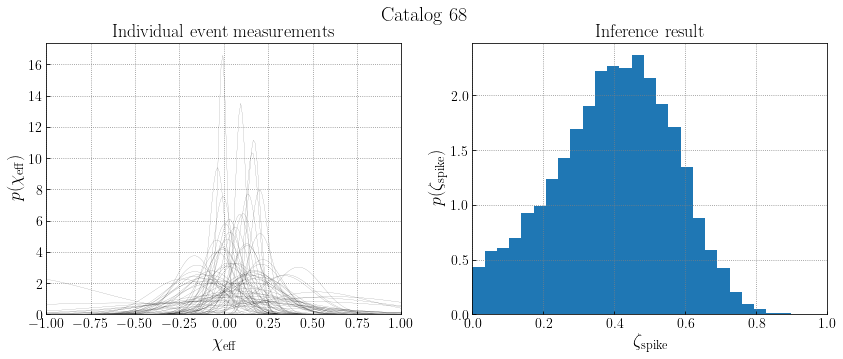

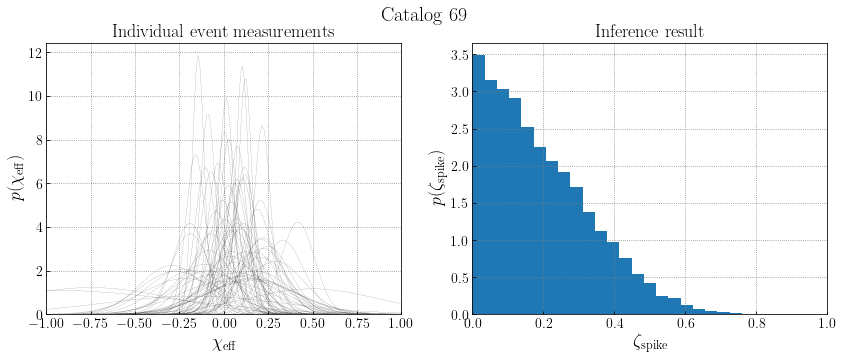

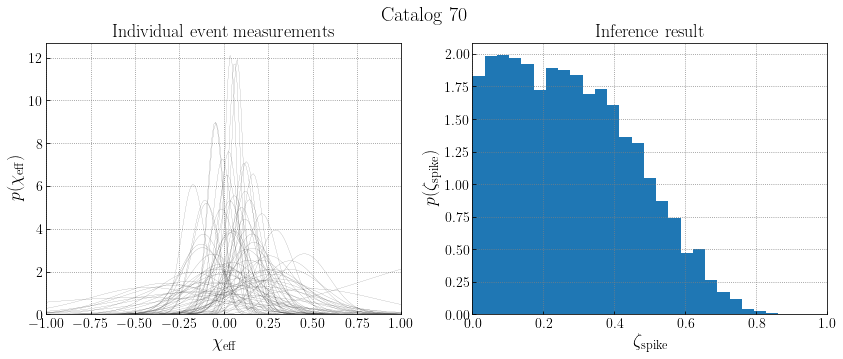

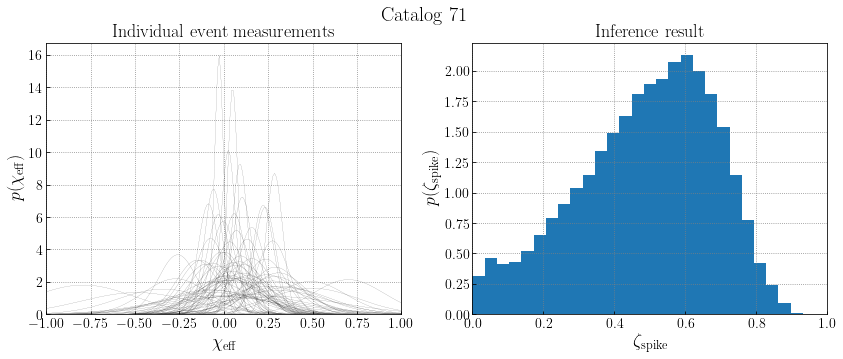

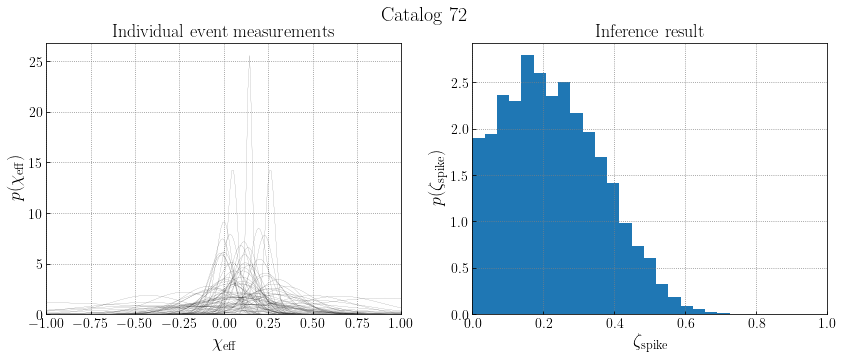

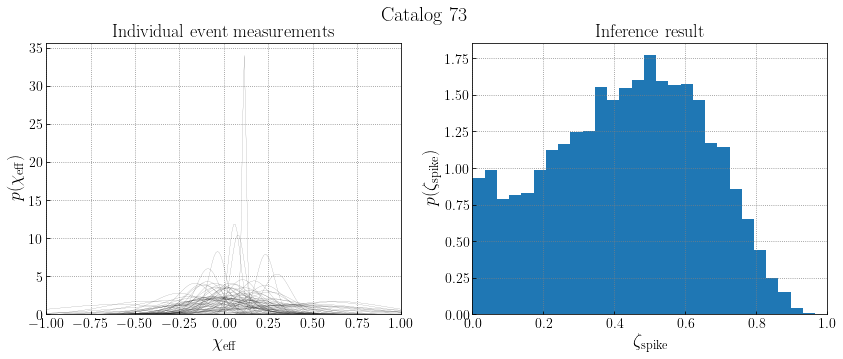

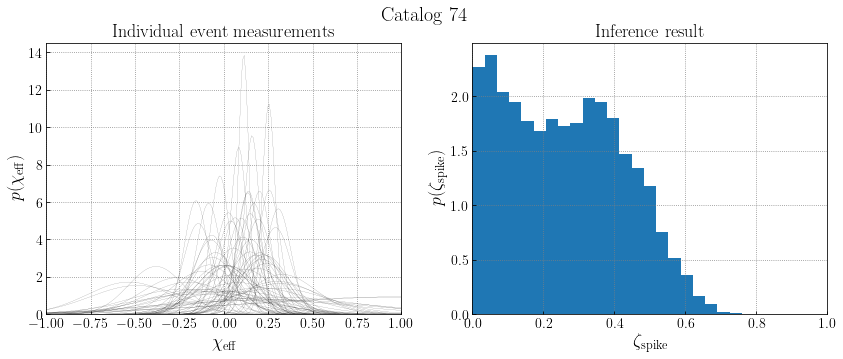

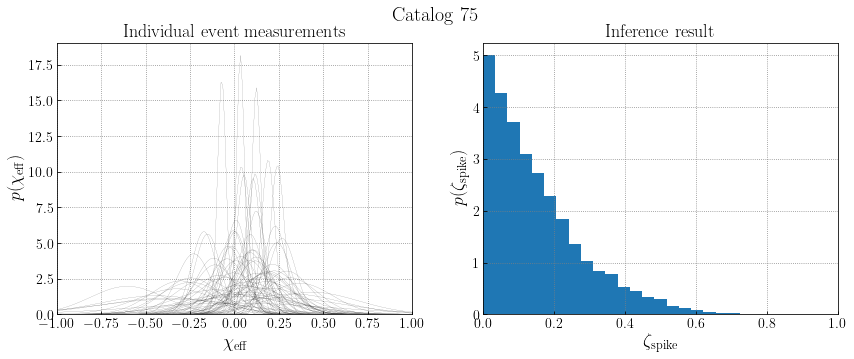

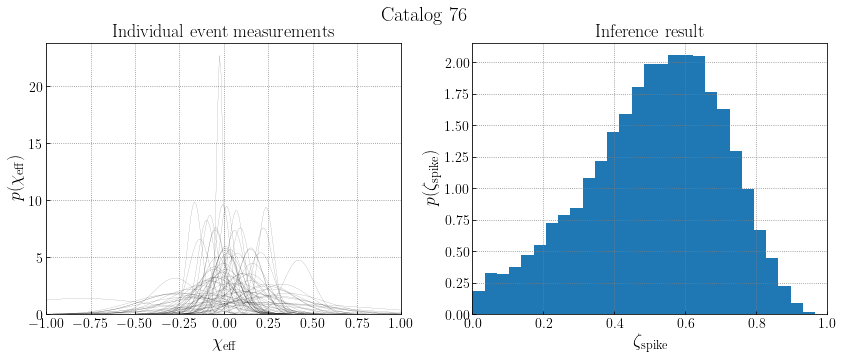

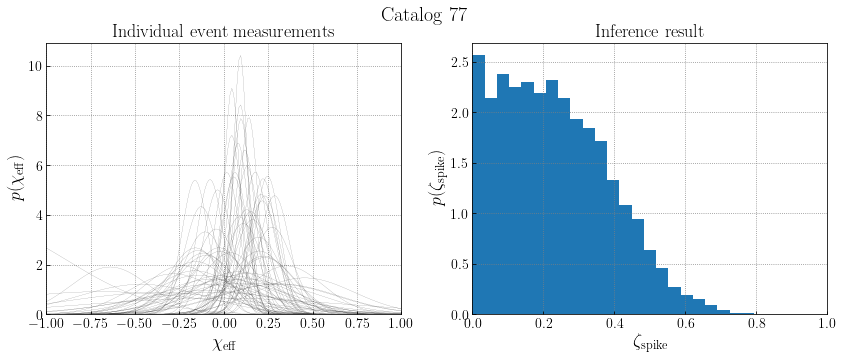

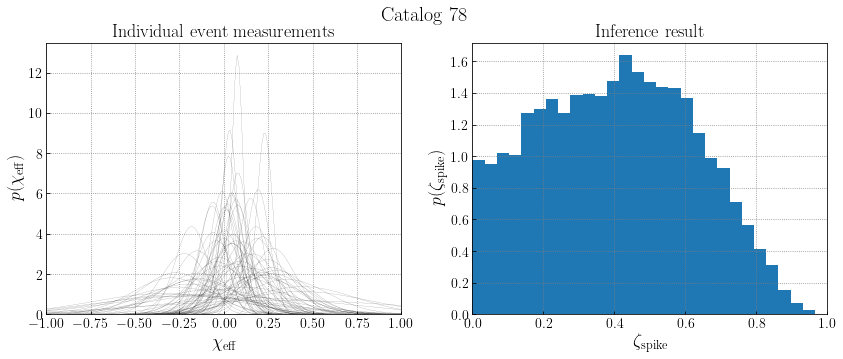

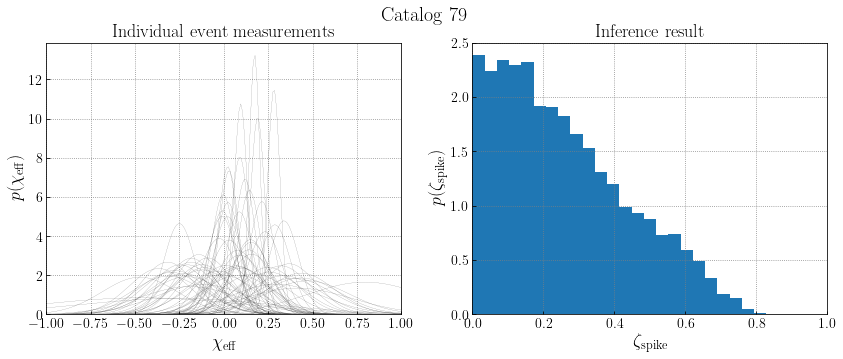

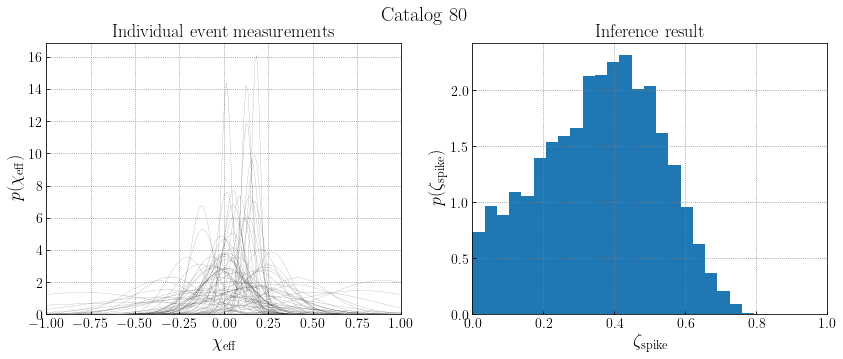

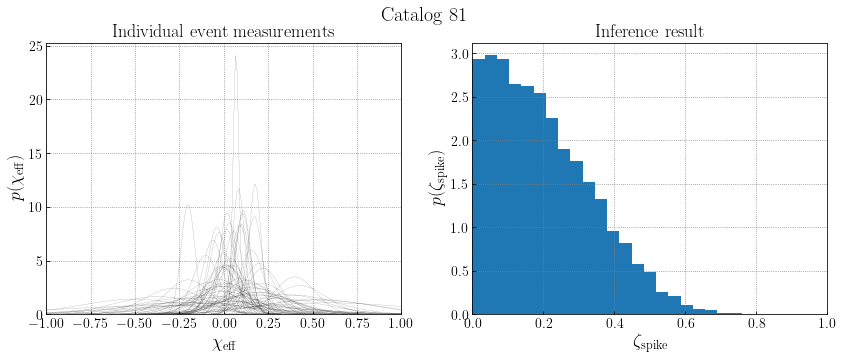

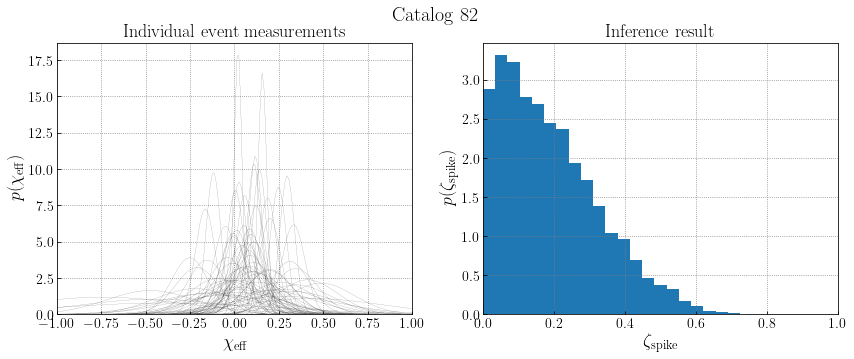

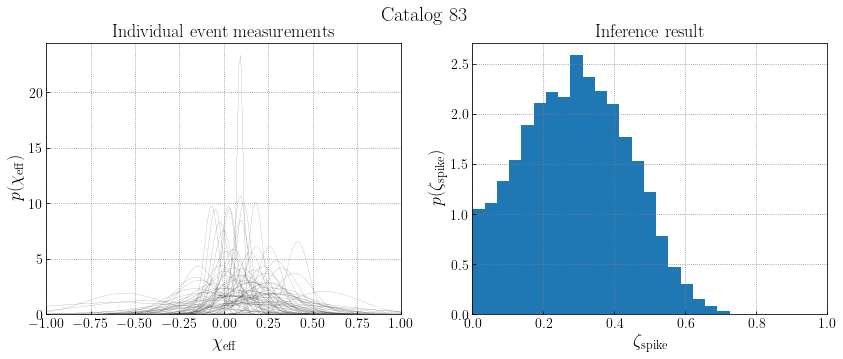

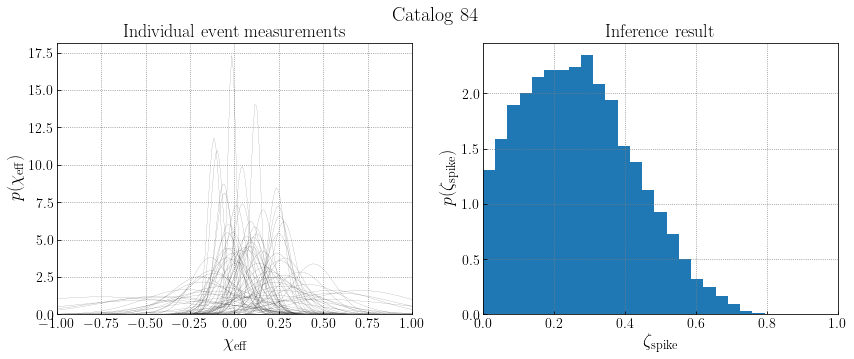

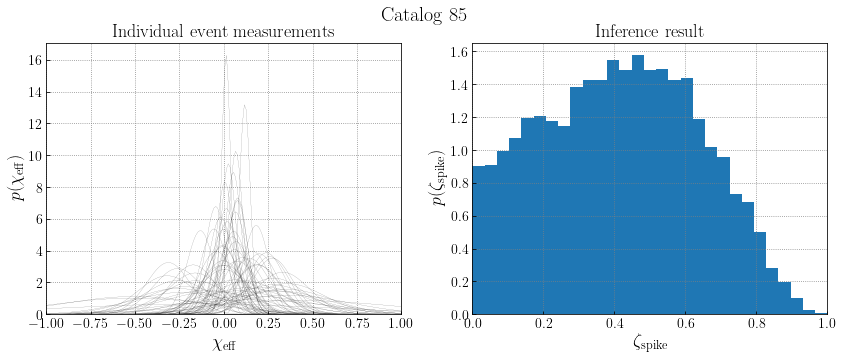

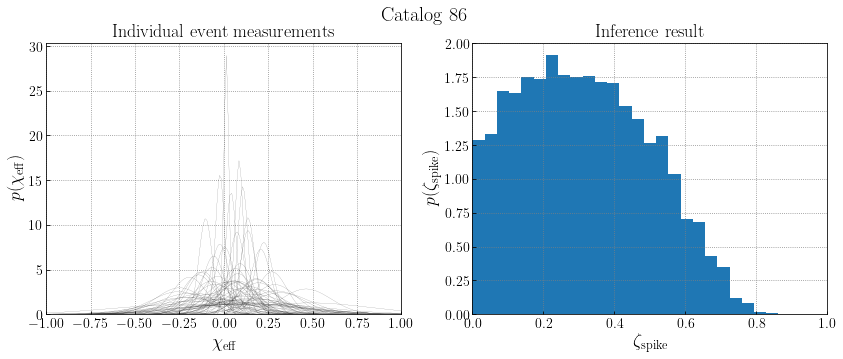

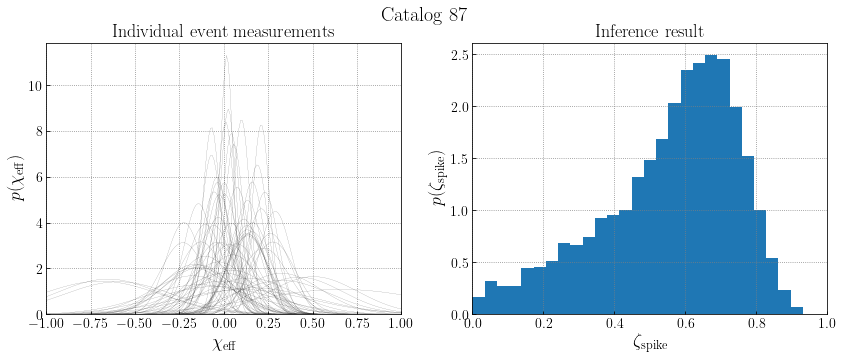

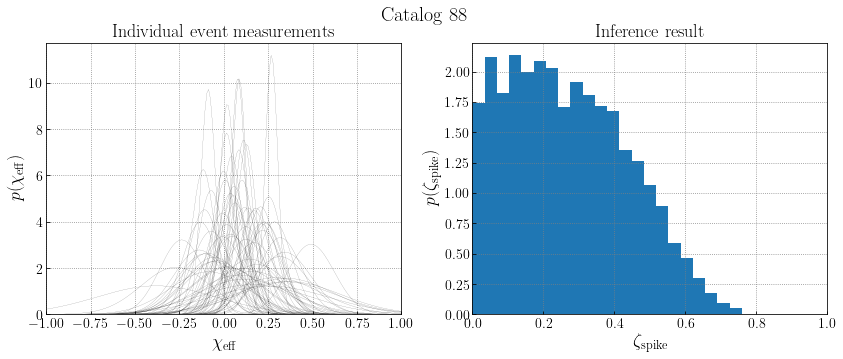

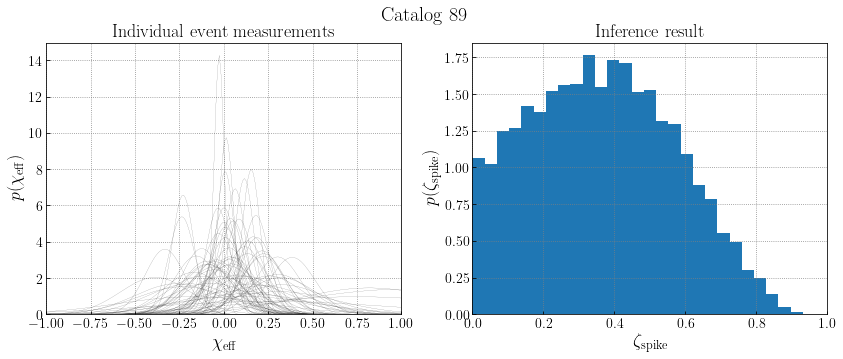

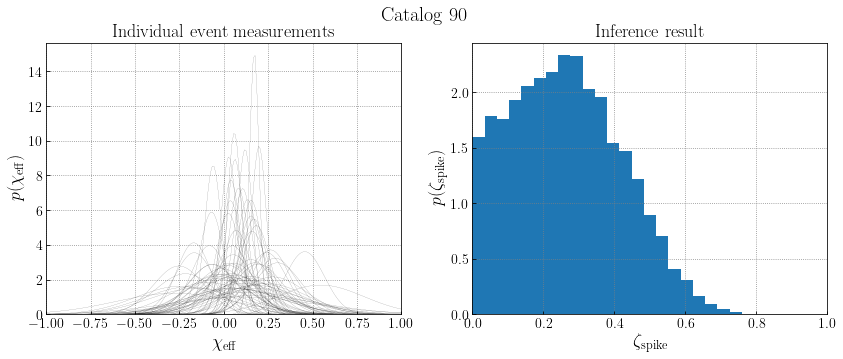

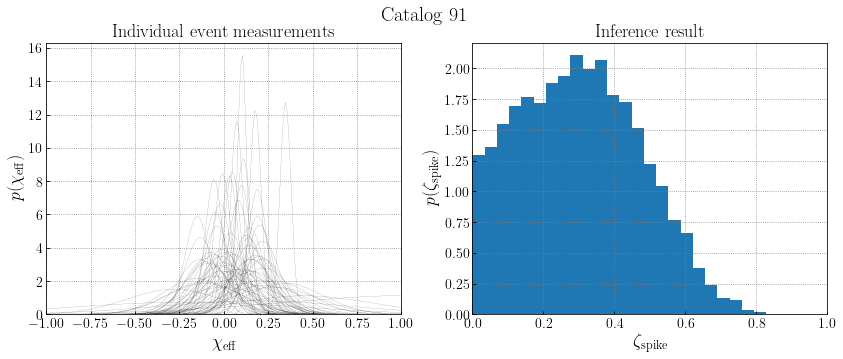

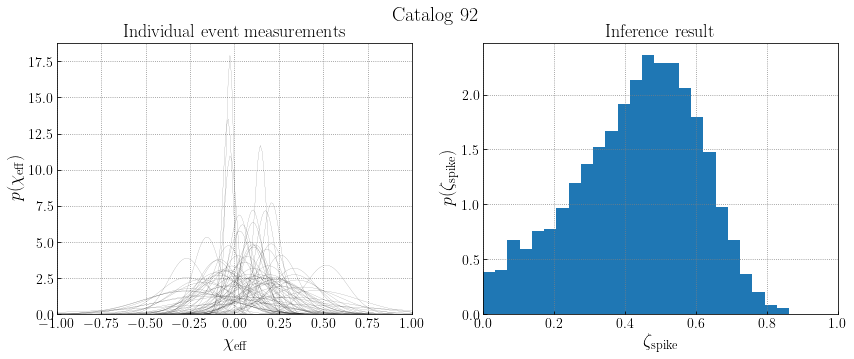

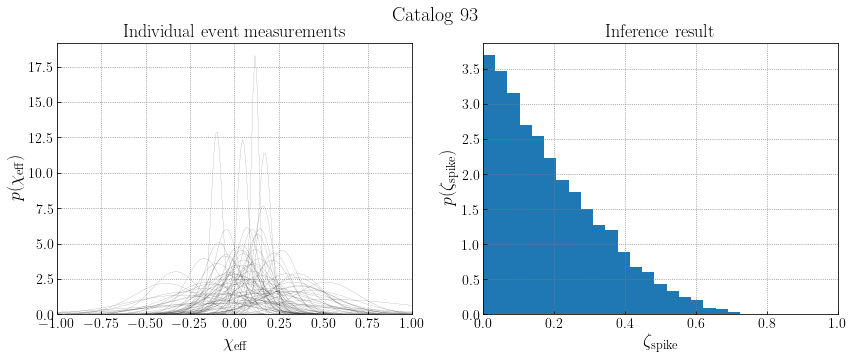

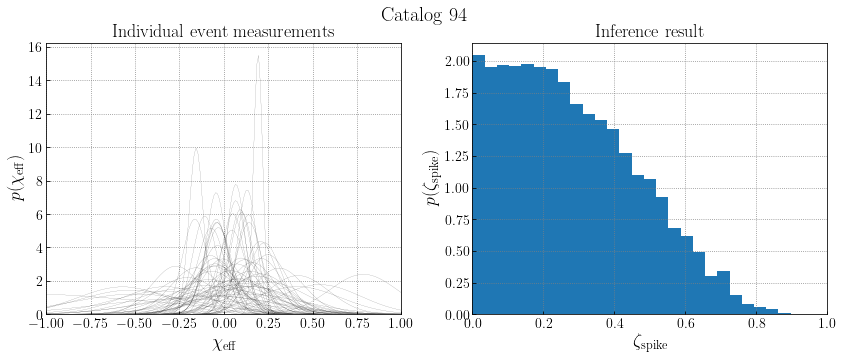

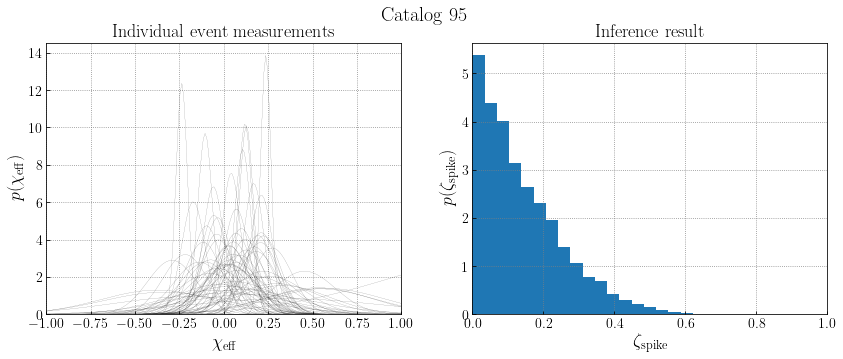

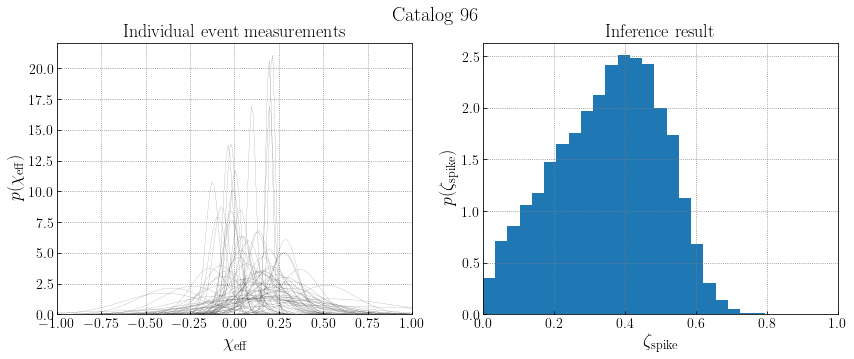

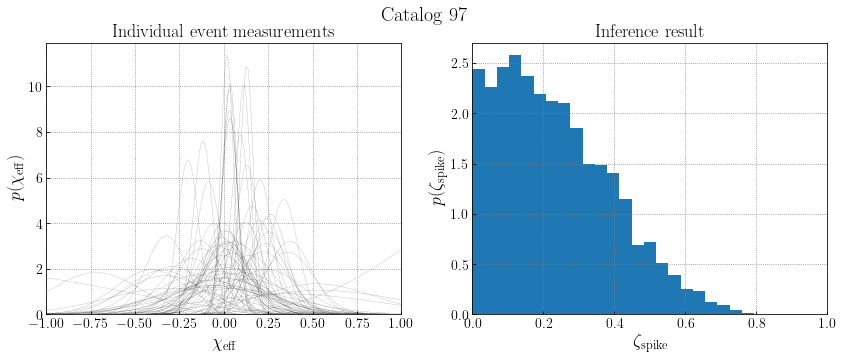

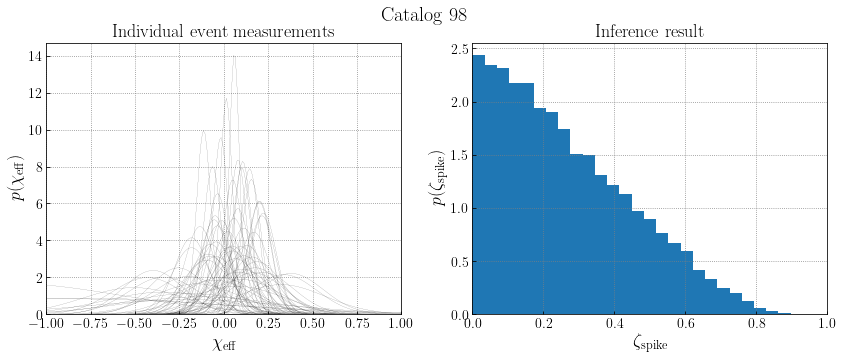

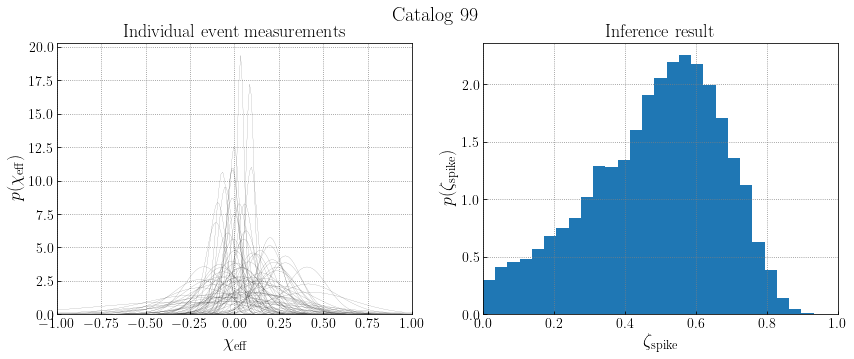

In [3]:
def gaussian(samples,mu,sigma,lowCutoff,highCutoff):
    
    """
    Function defining the probability density due to a truncated Gaussian
    """
    
    a = (lowCutoff-mu)/np.sqrt(2*sigma**2)
    b = (highCutoff-mu)/np.sqrt(2*sigma**2)
    norm = np.sqrt(sigma**2*np.pi/2)*(-erf(a) + erf(b))
    return np.exp(-(samples-mu)**2/(2.*sigma**2))/norm

# Loop across catalogs
for key,val in nullData.items():
    
    fig = plt.figure(figsize=(14,5))
    
    # Plot our mock measurements on individual events
    ax = fig.add_subplot(121)
    x_grid = np.linspace(-1,1,200)
    for eventNumber,event in val['catalog'].items():
        ax.plot(x_grid,gaussian(x_grid,event['x_ml'],event['sig_obs'],-1,1),color='black',lw=0.1)
    ax.set_xlim(-1,1)
    ax.set_ylim(bottom=0)
    ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
    ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=18)
    ax.set_title('Individual event measurements',fontsize=18)
    
    # Plot our posterior on zeta_spike
    ax = fig.add_subplot(122)
    ax.hist(val['posteriors']['zeta_spike'],density=True,bins=np.linspace(0,1,30))
    ax.set_xlim(0,1)
    ax.set_xlabel(r'$\zeta_\mathrm{spike}$',fontsize=18)
    ax.set_ylabel(r'$p(\zeta_\mathrm{spike})$',fontsize=18)
    ax.set_title('Inference result',fontsize=18)
    
    fig.suptitle('Catalog {0}'.format(key),fontsize=20)
    
    plt.show()